## 5 Lab: LMS Algorithm (15 pts)
To start with, please download the dataset.mat file from Sakai and load it into NumPy arraysa. There are two variables in the file: data $X ∈ R^{100×3}$ and target $D ∈ R^{100×1}$. Each individual pair of data and target is composed into $X$ and $D$ following the same way as discussed on Lecture 2 Page 8. Specifically, each row in $X$ correspond to the transpose of a data point, with the first element as constant 1 and the other two as the two input features $x_1k$ and $x_2k$. The goal of the learning task is finding the weight vector $W ∈ R^{3×1}$ for the linear model that can minimize the MSE loss, which is also formulated on Lecture 2 Page 7.

In [9]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
from mpl_toolkits import mplot3d

In [10]:
mat_fname = 'dataset.mat'
mat_contents = sio.loadmat(mat_fname)
print(f"Variable names in the dataset are: {sorted(mat_contents.keys())}")

Variable names in the dataset are: ['D', 'X', '__globals__', '__header__', '__version__']


In [11]:
D = mat_contents['D']
X = mat_contents['X']
print(f"Shape of D is {D.shape}")
print(f"Shape of X is {X.shape}")

Shape of D is (100, 1)
Shape of X is (100, 3)


(a) (3pt) Directly compute the least square (Wiener) solution with the provided dataset. What is the optimal weight $W^∗$? What is the MSE loss of the whole dataset when the weight is set to $W^∗$?

**ANSWER**: \
According to Lecture 2 Page 8, the least square (Wiener) solution for linear model is: 
$$
W^* = (X^TX)^{-1}X^TD = \begin{bmatrix}
1 \\ 1 \\ -2
\end{bmatrix} 
$$

The MSE loss of the whole dataset when the weight is set to $W^*$ is:
$$
L(W) = (D-XW)^T(D-XW)/2K = 5.04 e^{-5}
$$

In [12]:
W_star = np.linalg.inv(X.T @ X) @ X.T @ D
print(f"The optimal weight is \n{W_star}")

min_loss = ((D - X @ W_star).T) @ (D - X @ W_star) / (2 * D.shape[0])
print(f"The MSE loss with optimal weight is {min_loss[0][0]}")

The optimal weight is 
[[ 1.0006781 ]
 [ 1.00061145]
 [-2.00031968]]
The MSE loss with optimal weight is 5.0399515658683386e-05


(b) (4pt) Now consider that you can only train with 1 pair of data point and target each time. In such case, the LMS algorithm should be used to find the optimal weight. Please initialize the weight vector as $W_0 = [0, 0, 0]^T $, and update the weight with the LMS algorithm. After each epoch (every time you go through all the training data and loop back to the beginning), compute and record the MSE loss of the current weight on the whole dataset. Run LMS for 20 epochs with learning rate $r = 0.01$, report the weight you get in the end and plot the MSE loss in log scale vs. Epochs.

In [13]:
def LMS(epochs, lr, X=X, D=D):
    N = X.shape[0]
    W = np.array([0,0,0]).reshape(-1,1)
    MSEs = []
    for epoch in range(epochs):
        for i in range(N):
            x = X[i].reshape(-1,1)
            d = D[i]
            y = np.dot(W.T, x)
            e = d - y
            W = W + lr * e * x
        # calculate the MSE
        MSE = 0
        for i in range(N):
            x = X[i].reshape(-1,1)
            d = D[i]
            y = np.dot(W.T, x)
            e = d - y
            MSE += e **2 / 2   
        MSE /= N
        MSEs.append(MSE[0][0])
    return MSEs, W

In [14]:
EPOCHS = 20
LEARNING_RATE = 0.01
MSEs, W = LMS(EPOCHS, LEARNING_RATE)
print(f"The weight after training 20 epchosis \n{W}")

The weight after training 20 epchosis 
[[ 1.00074855]
 [ 1.00082859]
 [-2.00068123]]


**ANSWER**: \
The weight I get in the end is: 
$$
W = \begin{bmatrix}
1 \\ 1 \\ -2
\end{bmatrix} 
$$

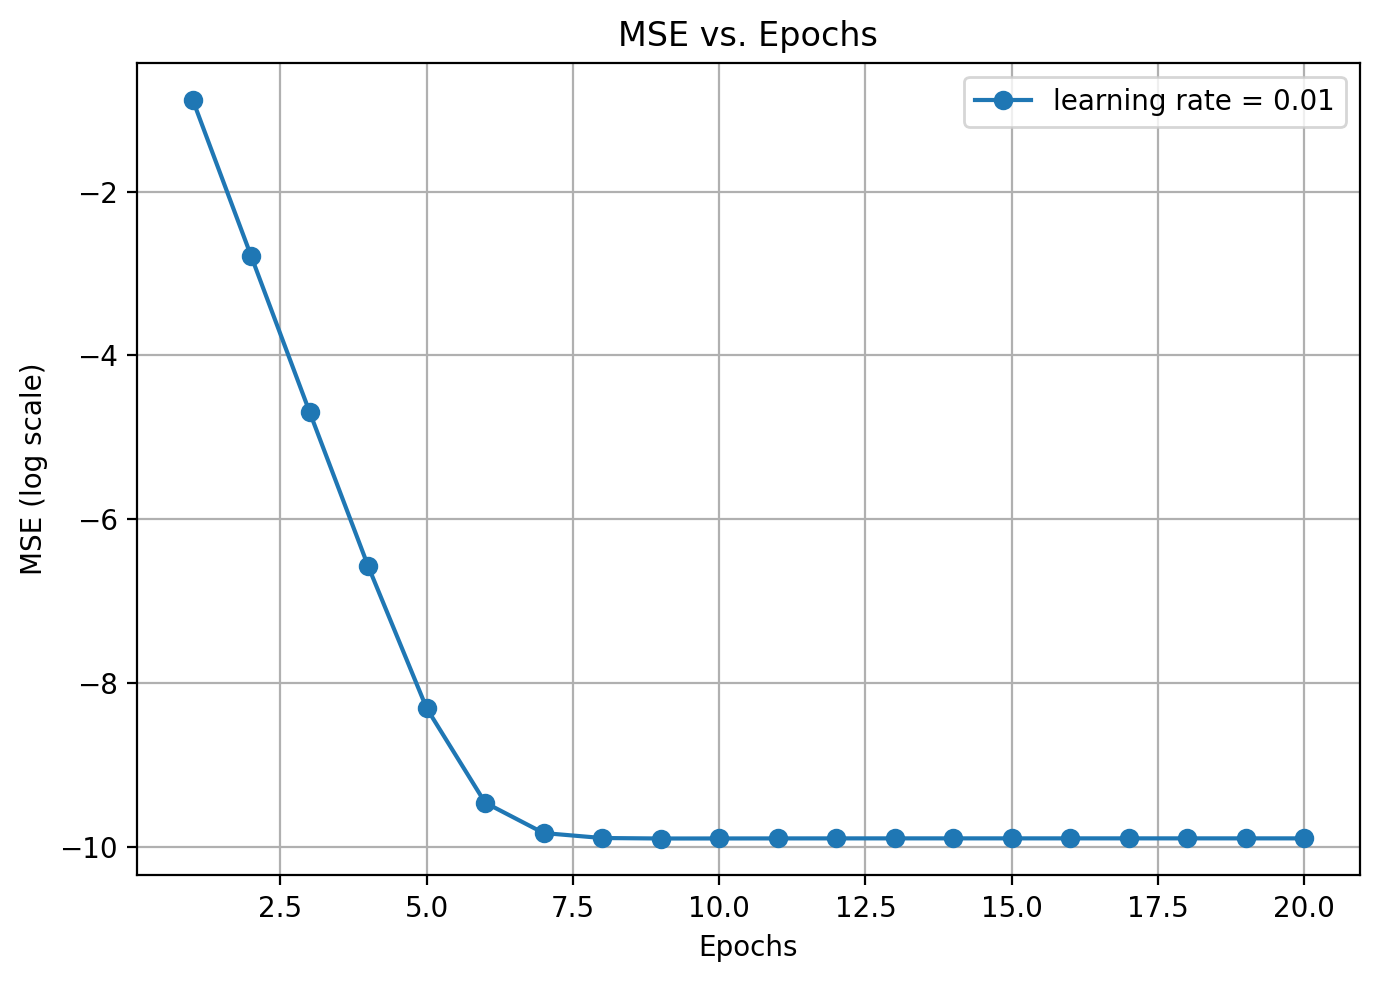

In [18]:
plt.figure(figsize=(7,5), dpi= 100) 
plt.plot(range(1, EPOCHS + 1), np.log(MSEs), 'o-', label='learning rate = 0.01')
plt.xlabel('Epochs')
plt.ylabel('MSE (log scale)')
plt.legend()
plt.title('MSE vs. Epochs')
plt.grid('on')
plt.tight_layout()
plt.show()

(c) (3pt) Scatter plot the points $(x_{1k},x_{2k},d_{k})$ for all 100 data-target pairs in a 3D figureb, and plot the lines corresponding to the linear models you got in (a) and (b) respectively in the same figure. Observe if the linear models fit the data well.


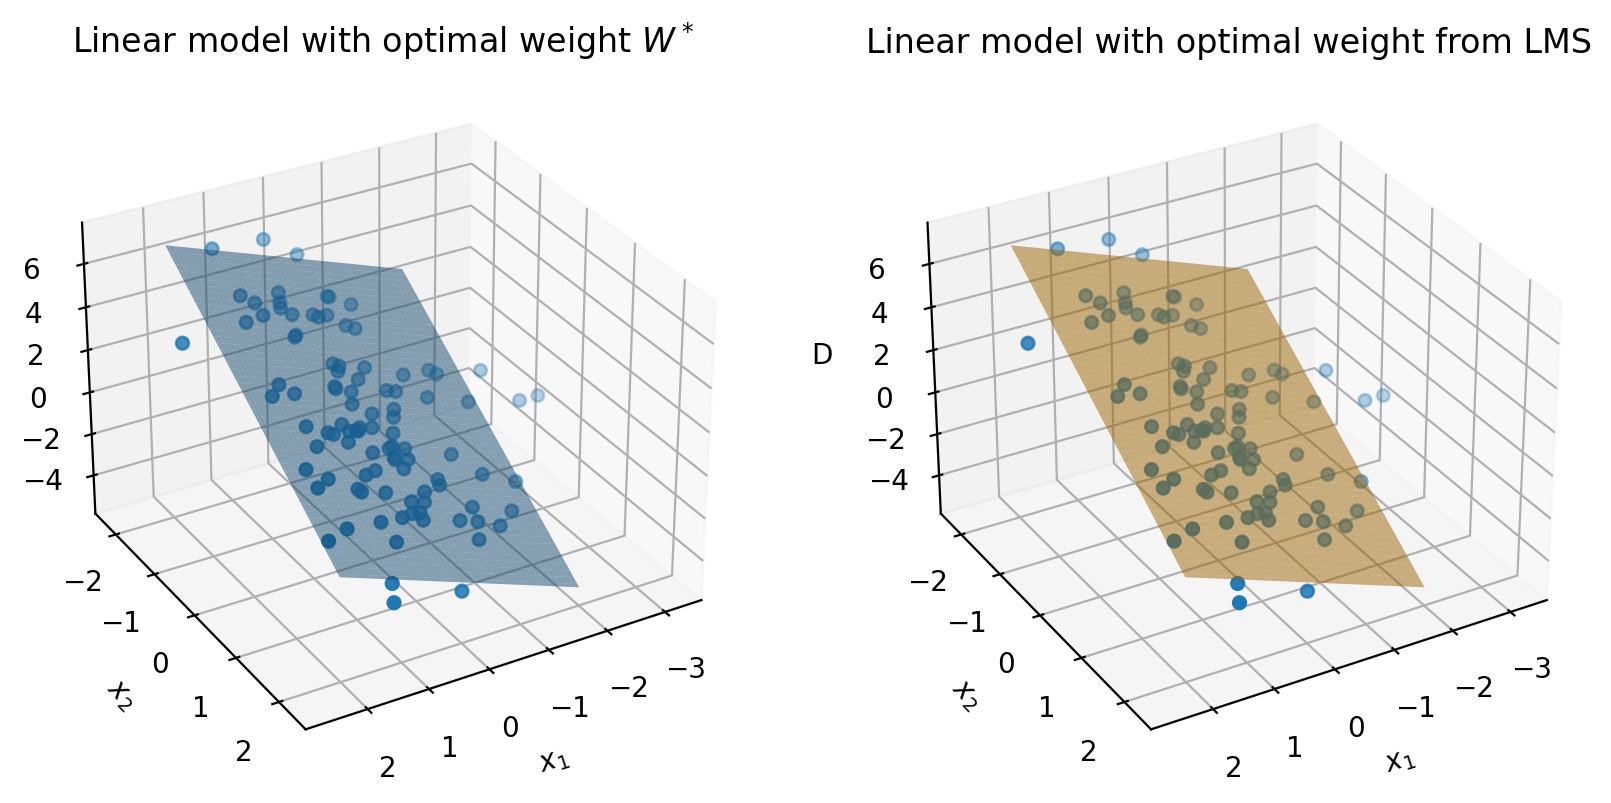

In [19]:
fig = plt.figure(figsize=(10,5), dpi= 100)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter3D(X[:,1], X[:,2], D)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('D')
Z_star = W_star[0] + W_star[1] * X1 + W_star[2] * X2
ax1.plot_surface(X1, X2, Z_star, alpha=0.5)
ax1.set_title('Linear model with optimal weight $W^*$')


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter3D(X[:,1], X[:,2], D)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('D')
Z = W[0] + W[1] * X1 + W[2] * X2
ax2.plot_surface(X1, X2, Z, alpha=0.5, color='orange')
ax2.set_title('Linear model with optimal weight from LMS')

# change an angle to see the 3D plot
ax1.view_init(30, 60)
ax2.view_init(30, 60)

According the 3D scatter plot and contour, the linear model fits the data well.

(d) (5pt) Learning rate r is an important hyperparameter for the LMS algorithm, as well as for CNN optimization. Here, try repeat the process in (b) with r set to 0.005, 0.05 and 0.5 respectively. Together with the result you got in (b), plot the MSE losses of the 4 sets of experiments in log scale vs. Epochs in one figure. Then try further enlarge the learning rate to r = 1 and observe how the MSE changes. Base on these observations, comment on how learning rate affects the speed and quality of the learning process. (Note: The learning rate tuning for the CNN optimization will be introduced in Lecture 7.)

In [20]:
EPOCHS = 20
LEARNING_RATE_1 = 0.01
LEARNING_RATE_2 = 0.005
LEARNING_RATE_3 = 0.05
LEARNING_RATE_4 = 0.5
LEARNING_RATE_5 = 1

MSEs_1, W_1 = LMS(epochs=EPOCHS, lr=LEARNING_RATE_1)
MSEs_2, W_2 = LMS(epochs=EPOCHS, lr=LEARNING_RATE_2)
MSEs_3, W_3 = LMS(epochs=EPOCHS, lr=LEARNING_RATE_3)
MSEs_4, W_4 = LMS(epochs=EPOCHS, lr=LEARNING_RATE_4)
MSEs_5, W_5 = LMS(epochs=EPOCHS, lr=LEARNING_RATE_5)

/var/folders/qr/0t0s0b6j05d91gr0q4c86jsm0000gn/T/ipykernel_85582/1495995928.py:19: RuntimeWarning: overflow encountered in square
  MSE += e **2 / 2


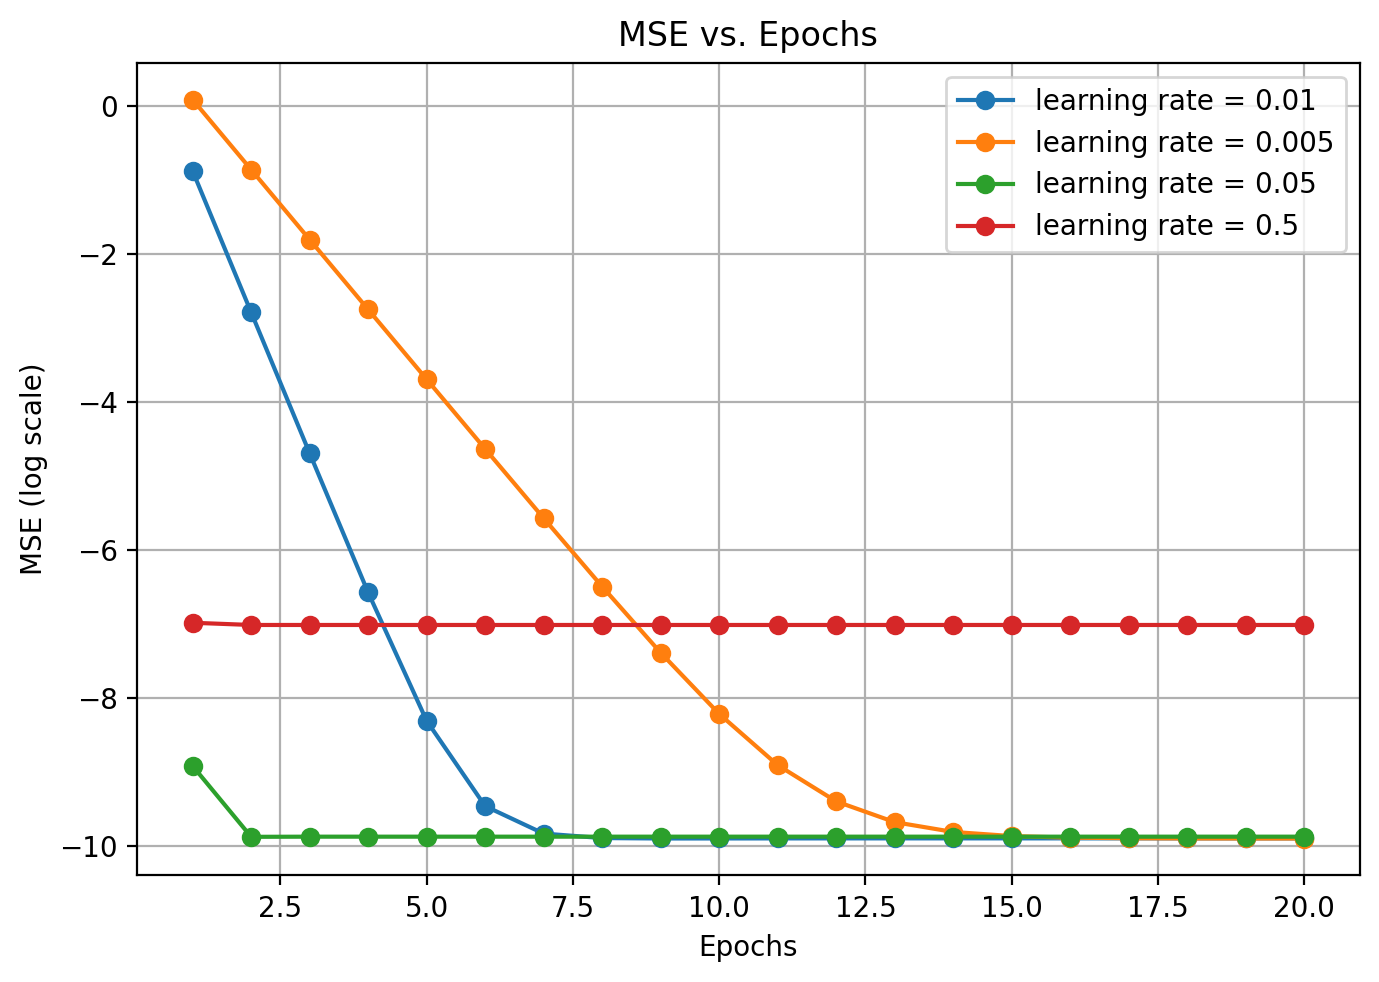

In [22]:
plt.figure(figsize=(7,5), dpi= 100) 
plt.plot(range(1, EPOCHS+1), np.log(MSEs_1), 'o-', label='learning rate = 0.01')
plt.plot(range(1, EPOCHS+1), np.log(MSEs_2), 'o-',label='learning rate = 0.005')
plt.plot(range(1, EPOCHS+1), np.log(MSEs_3), 'o-',label='learning rate = 0.05')
plt.plot(range(1, EPOCHS+1), np.log(MSEs_4), 'o-',label='learning rate = 0.5')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MSE (log scale)')
plt.title('MSE vs. Epochs')
plt.grid('on')
plt.tight_layout()
plt.show()

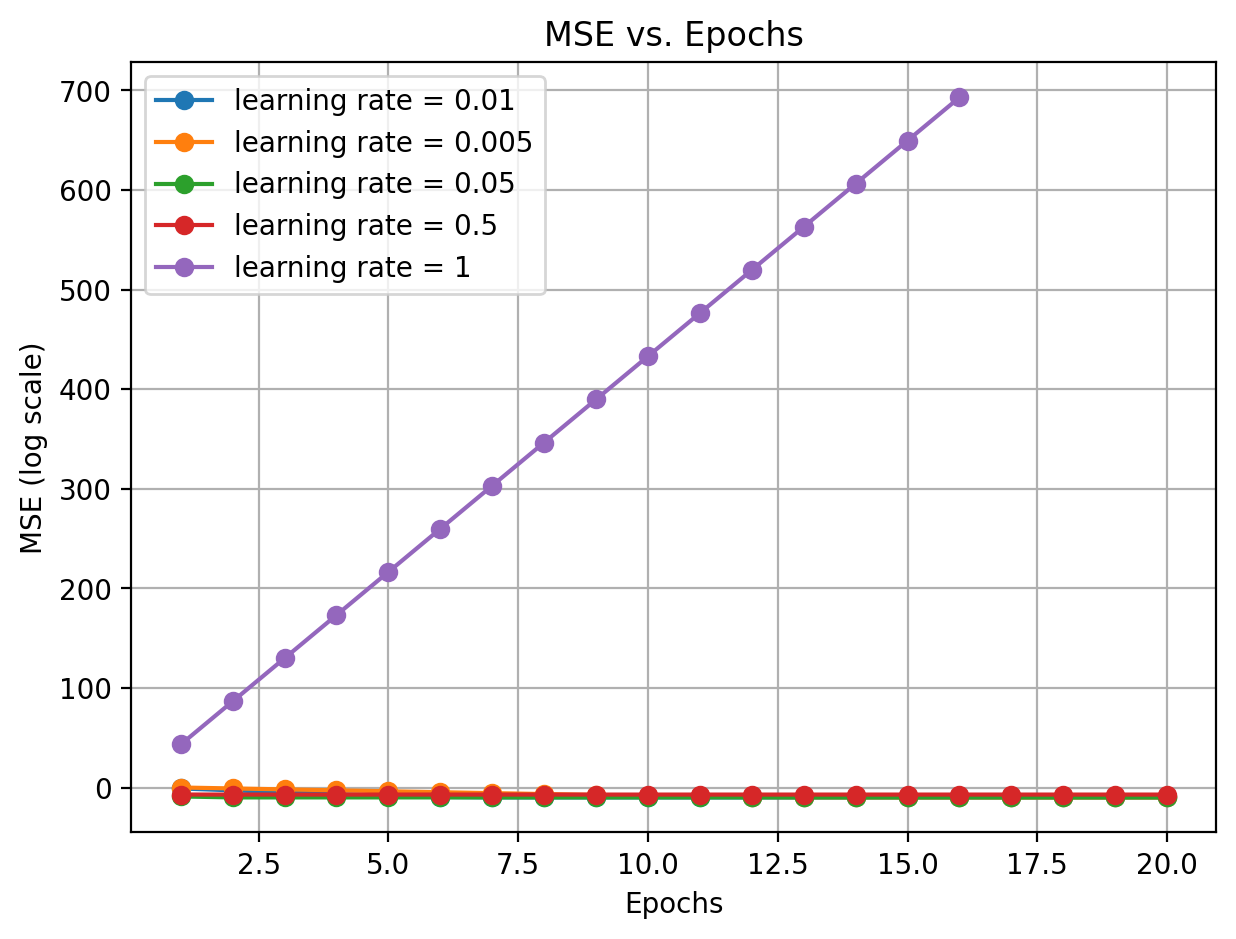

In [24]:
plt.figure(figsize=(7,5), dpi= 100) 
plt.plot(range(1, EPOCHS+1), np.log(MSEs_1), 'o-', label='learning rate = 0.01')
plt.plot(range(1, EPOCHS+1), np.log(MSEs_2), 'o-',label='learning rate = 0.005')
plt.plot(range(1, EPOCHS+1), np.log(MSEs_3), 'o-',label='learning rate = 0.05')
plt.plot(range(1, EPOCHS+1), np.log(MSEs_4), 'o-',label='learning rate = 0.5')
plt.plot(range(1, EPOCHS+1), np.log(MSEs_5), 'o-',label='learning rate = 1')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MSE (log scale)')
plt.grid('on')
plt.title('MSE vs. Epochs')
plt.show()

**Comment**: \
At $lr = 0.005$, the training process slowly converges to its gloabl minimum. It is very stable and the quality of training is essured, but it takes more epoches to reach a minimum MSE compared to a higher learning rate. Increasing $lr$ to 0.05, it shows a good balance between speed and the quality. It converges faster but still stably reaches minimum MSE in the training process. With a higher learning rate ($lr=0.05$), the drop of MSE is much faster in the first epoch. Further increasing learning rate ($lr=0.5$) led to overshooting the minimum, resulting in suboptimal model performance. Finally at a much higher learning rate ($lr=1$), the MSE loss continully increases, leading to divergence in the end. Therefore, properly tuning learning rate is crucial to strike a balance between speed and model accuracy.